In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tkinter import _flatten

In [26]:
import re
import jieba

In [104]:
data = pd.read_excel("好大夫好评.xlsx", header=None, index_col=None, names=None)

In [105]:
len(data)

39280

In [91]:
def sw(filename):
    with open(filename, encoding="utf-8") as file:
        x = file.readlines()
    y = [word.strip() for word in x]
    return y

In [106]:
name_list = ['stopword/baidu_stopwords.txt', 'stopword/cn_stopwords.txt', 
            'stopword/hit_stopwords.txt','stopword/scu_stopwords.txt','stopword/select.txt']
stop_word = []
for x in name_list:
    stop_word.extend(sw(x))
    stop_word = list(set(stop_word))

In [109]:
data["分词"]=""

In [110]:
for i in range(len(data)):
    line = ''.join(re.findall('[\u4e00-\u9fa5]',str(data[0][i])))
    if line:
        c = jieba.lcut(line)
        result = [word for word in c if word not in stop_word]
        c = [word for word in result if len(word)>1]
        data["分词"][i] = ' '.join(c)

In [111]:
content = data['分词']
cut_word_list = list(map(lambda x: ''.join(x), content.tolist()))
content_str = ' '.join(cut_word_list).split()
word_fre = pd.Series(_flatten(content_str)).value_counts()  # 统计词频

In [112]:
keywords = word_fre[:20].index

In [113]:
matrix = np.zeros((len(keywords)+1)*(len(keywords)+1)).reshape(len(keywords)+1, len(keywords)+1).astype(str)
matrix[0][0] = np.NaN
matrix[1:, 0] = matrix[0, 1:] = keywords
matrix

array([['nan', '病情', '医生', '康复', '情况', '过程', '描述', '看病', '手术', '主任',
        '治疗', '恢复', '术后', '非常', '耐心', '医院', '检查', '病人', '我们', '感谢', '教授'],
       ['病情', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0'],
       ['医生', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0'],
       ['康复', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0'],
       ['情况', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0'],
       ['过程', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '0.0', '0.0', '0.0'],
 

In [114]:
cont_list = [cont.split() for cont in cut_word_list]
for i, w1 in enumerate(word_fre[:20].index):
    for j, w2 in enumerate(word_fre[:20].index):
        count = 0
        for cont in cont_list:
            if w1 in cont and w2 in cont:
                if abs(cont.index(w1)-cont.index(w2)) == 0 or abs(cont.index(w1)-cont.index(w2)) == 1:
                    count += 1
        matrix[i+1][j+1] = count

In [115]:
kwdata = pd.DataFrame(data=matrix)
kwdata.to_csv('关键词共现矩阵_好评.csv', index=False, header=None, encoding='utf-8-sig')

In [116]:
df = pd.read_csv('关键词共现矩阵_好评.csv')

In [117]:
df.index = df.iloc[:, 0].tolist()
df_ = df.iloc[:20, 1:21]
df_.astype(int)

,病情,医生,康复,情况,过程,描述,看病,手术,主任,治疗,恢复,术后,非常,耐心,医院,检查,病人,我们,感谢,教授
病情,21121,511,14,615,52,18723,6,195,242,645,822,20,184,109,16,75,75,20,149,59
医生,511,12748,9,271,2627,201,37,273,62,200,65,48,420,699,145,147,90,65,524,30
康复,14,9,18857,18358,4,0,0,15,2,27,3,61,4,0,22,1,8,1,4,1
情况,615,271,18358,19674,5,0,16,1239,137,250,961,1997,189,23,16,44,99,42,65,30
过程,52,2627,4,5,19887,3,19367,608,1206,113,35,75,151,150,130,264,35,99,121,287
描述,18723,201,0,0,3,19573,17,115,82,28,16,78,23,13,13,82,37,35,29,24
看病,6,37,0,16,19367,17,19685,4,30,15,13,0,11,10,13,8,3,3,4,10
手术,195,273,15,1239,608,115,4,12986,206,943,294,294,291,38,66,112,41,55,30,101
主任,242,62,2,137,1206,82,30,206,6525,79,27,16,156,211,59,38,52,62,424,21
治疗,645,200,27,250,113,28,15,943,79,6690,48,71,28,34,63,52,13,24,30,46


C:\Users\DELL\AppData\Local\Temp\ipykernel_17780\1535661569.py:4: UserWarning: Glyph 21307 (\N{CJK UNIFIED IDEOGRAPH-533B}) missing from current font.
  plt.savefig('共现网络图.jpg')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17780\1535661569.py:4: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  plt.savefig('共现网络图.jpg')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17780\1535661569.py:4: UserWarning: Glyph 27809 (\N{CJK UNIFIED IDEOGRAPH-6CA1}) missing from current font.
  plt.savefig('共现网络图.jpg')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17780\1535661569.py:4: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  plt.savefig('共现网络图.jpg')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17780\1535661569.py:4: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  plt.savefig('共现网络图.jpg')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17780\1535661569.py:4: UserWarning: Glyph 26415 (\N{CJK UNIFIED IDE

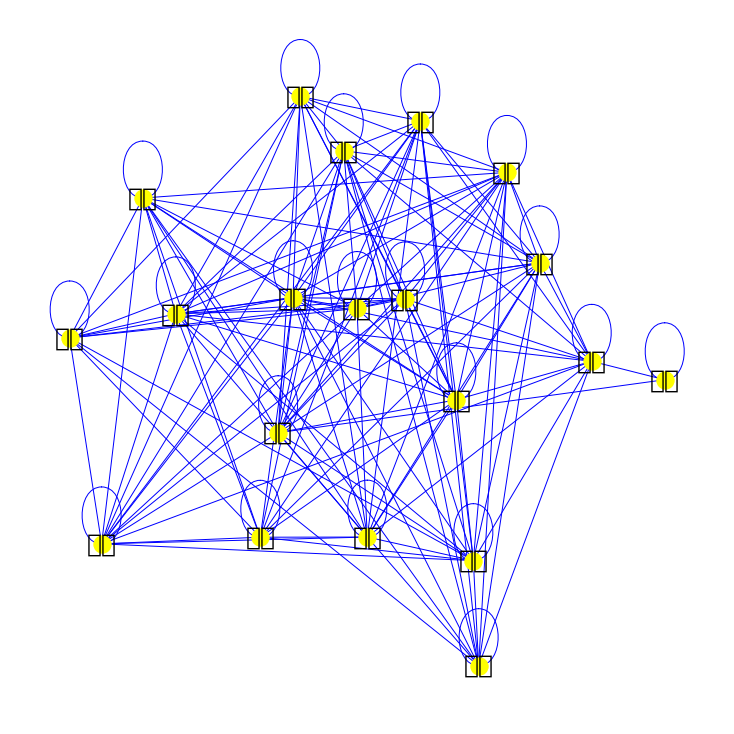

In [103]:
plt.figure(figsize=(10, 10))
graph1 = nx.from_pandas_adjacency(df_)
nx.draw(graph1, with_labels=True, node_color='yellow', font_size=25, edge_color='blue')
plt.savefig('共现网络图.jpg')